In [27]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import plotnine as p9

from sklearn.linear_model import Lasso, LassoCV, lasso_path, enet_path, Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/train_processed.csv')

In [4]:
# Normalize the features

feats = list(set(df.columns) - set(['logSalePrice', 'SalePrice']))
df_normalized = df.copy()
df_normalized[feats] = (df[feats] - df[feats].mean()) / df[feats].std()
# df_normalized['logSalePrice'] = df['logSalePrice']
df_normalized['SalePrice'] = df['SalePrice'] / 1000000  # convert the unit to millions

In [96]:
X = df_normalized[feats]
y = df_normalized['logSalePrice']

alphas = 10 ** np.arange(-3.5, 2, 0.01)

In [97]:
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, alphas=alphas)
alphas_enet, coefs_enet, _ = enet_path(
    X, y, l1_ratio=0.2,
    alphas=alphas)

In [98]:
alphas_ridge = 10 ** np.arange(-3.5, 2, 0.01)
clf = Ridge()
coefs_ridge = np.empty((X.shape[1], len(alphas_ridge)))
for i in range(len(alphas_ridge)):
    clf.set_params(alpha=alphas_ridge[i])
    clf.fit(X, y)
    coefs_ridge[:, i] = list(clf.coef_)

In [36]:
coefs_lasso.shape

(269, 150)

In [73]:
np.sum(np.abs(coefs_lasso[:, 0]))

0.2969166296159785

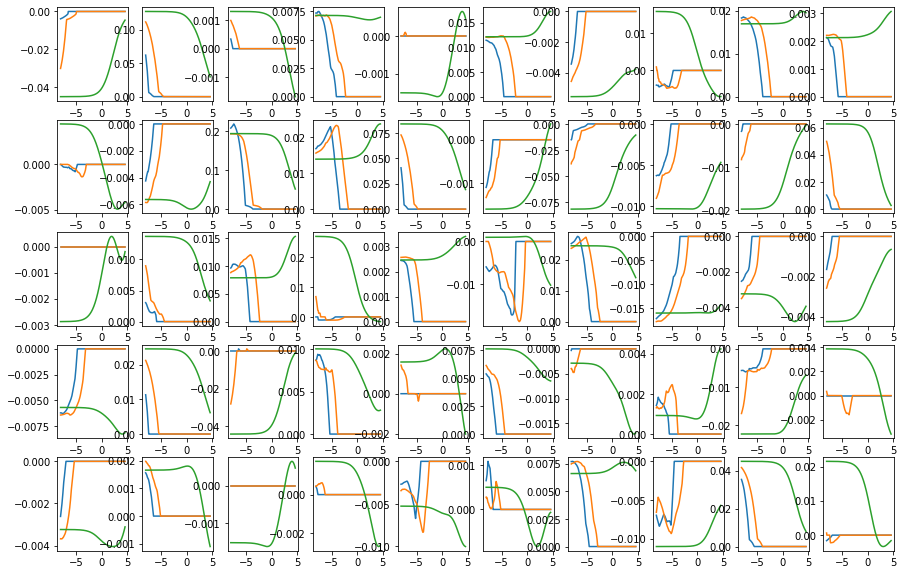

In [99]:
plt.figure(figsize=(15, 10))
for i in range(50):
    plt.subplot(5,10,i+1)
    var_id = i
    plt.plot(np.log(alphas_lasso), coefs_lasso[var_id, :])
    plt.plot(np.log(alphas_enet), coefs_enet[var_id, :])
    plt.plot(np.log(alphas_ridge), coefs_ridge[var_id, :])

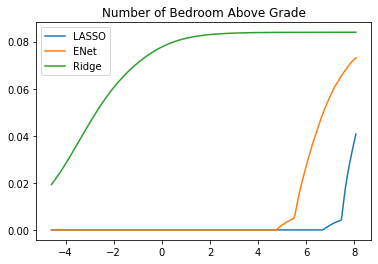

In [100]:
var_id = 14
plt.plot(-np.log(alphas_lasso), coefs_lasso[var_id, :], label='LASSO')
plt.plot(-np.log(alphas_enet), coefs_enet[var_id, :], label='ENet')
plt.plot(-np.log(alphas_ridge), coefs_ridge[var_id, :], label='Ridge')
plt.title('Number of Bedroom Above Grade')
plt.legend()

In [101]:
df.columns[32]

'HeatingQC_Po'

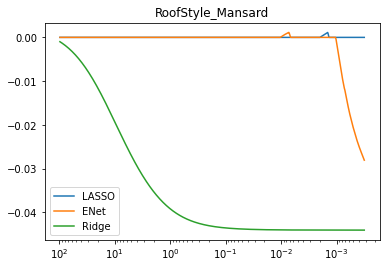

In [115]:
var_id = 32
plt.plot(alphas_lasso, coefs_lasso[var_id, :], label='LASSO')
plt.plot(alphas_enet, coefs_enet[var_id, :], label='ENet')
plt.plot(alphas_ridge, coefs_ridge[var_id, :], label='Ridge')
plt.title('RoofStyle_Mansard')
plt.gca().set_xscale('log')
plt.gca().invert_xaxis()
plt.legend()

0.03388441561391688

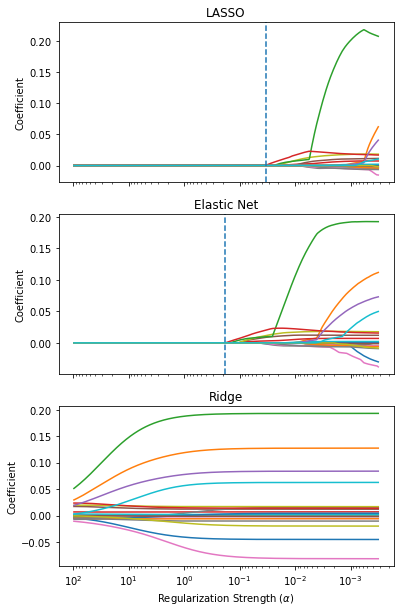

In [169]:
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(6, 10))
for var_id in range(20):
    ax[0].plot(alphas_lasso, coefs_lasso[var_id, :])
    ax[0].set_title('LASSO')
    
for var_id in range(20):
    ax[1].plot(alphas_enet, coefs_enet[var_id, :])
    ax[1].set_title('Elastic Net')

for var_id in range(20):
    ax[2].plot(alphas_ridge, coefs_ridge[var_id, :])
    ax[2].set_title('Ridge')

# Because x axis is shared, change one x axis will affect all subplots
ax[2].set_xscale('log')
ax[2].invert_xaxis()
ax[2].set_xlabel('Regularization Strength ($\\alpha$)')

for i in range(3):
    ax[i].set_ylabel('Coefficient')

# Add lines to show first non-zero coefficient
idx_1st_non_zero = np.where(coefs_lasso[0:20, :].sum(axis=0))[0][0]
alpha_1st_non_zero = alphas_lasso[idx_1st_non_zero]
ax[0].axvline(x=alpha_1st_non_zero, linestyle='--')

idx_1st_non_zero = np.where(coefs_enet[0:20, :].sum(axis=0))[0][0]
alpha_1st_non_zero = alphas_enet[idx_1st_non_zero]
ax[1].axvline(x=alpha_1st_non_zero, linestyle='--')